In [18]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

**Problem Statement**

The CEO of a restaurant franchise is considering different cities for opening a new outlet. He wants to expand his business to cities that may give his restaurant higher profits. The chain already has restaurants in various cities and you have data for profits and populations from the cities. You also have data on cities that are candidates for a new restaurant. For these cities, you have the city population. The analysis done for identifying which cities may potentially give his business higher profits is as follow:

In [5]:
# Load provided data
data = np.loadtxt("data/linear_regression1.txt", delimiter=',')
x_train, y_train = data[:,0], data[:,1]
assert x_train.shape == y_train.shape

In [98]:
# Define visualization function
def visualize(x: NDArray, y: NDArray, line: NDArray = None) -> None:
    """
    Generates scatter plot for data visualization

    Args:
        x (NDArray): x values.
        y (NDArray): y values.
        line (NDArray): Values to create a line (optional).
    """
    plt.scatter(x_train, y_train, marker='x', color='r') 
    plt.title("Profits vs. Population per city")
    plt.ylabel('Profit in $10,000')
    plt.xlabel('Population of City in 10,000s')
    
    if line is not None:
        plt.plot(x_train, line, color='b')
    plt.show()

Create a cost function implementation using the cost function formula:
$$
J(w, b)=\frac 1 {2m} \sum_{i=0}^{m-1} \big( \hat y^{(i)}-y^{(i)}\big)^2
$$

In [19]:
def cost_function(x: NDArray, y: NDArray, w: float, b: float) -> float:
    """
    Model cost function.

    Args:
        x (NDArray): Population of the city.
        y (NDArray): Restaurant profit.
        w (float): Linear parameter.
        b (float): Constant parameter.

    Returns:
        float: Cost value.
    """
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        prediction = (x[i] * w) + b
        correct_value = y[i]
        cost = (prediction - correct_value) ** 2
        total_cost += cost
    return total_cost / (2 * m)

assert np.isclose(cost_function(x_train, y_train, 2, 1), 75.203)

Implement gradient descent using the following formulas for each step:
$$
w=w - \bigg(\alpha \frac{d}{d w}J( w, b)\bigg)
$$
$$
b=b - \bigg(\alpha \frac{d}{db}J( w, b)\bigg)
$$
Doing the derivative we arrive at the folowing simplified formulas:
$$
w=w-\frac \alpha {m} \sum_{i=0}^{m-1} \big( f_{ w,b}(x^{(i)}) -y^{(i)}\big)x^{(i)}
$$
$$
b=b-\frac \alpha {m} \sum_{i=0}^{m-1} \big( f_{ w,b}(x^{(i)}) -y^{(i)}\big)
$$

In [79]:
def calculate_gradient(x: NDArray, y: NDArray,
        w: float, b: float, alpha: float) -> tuple[float, float]: 
    """
    Calculates gradient for w and b parameters.

    Args:
        x (NDArray): Population of the city.
        y (NDArray): Restaurant profit.
        w (float): Linear parameter.
        b (float): Constant parameter.
        alpha (float): Learning rate.

    Returns:
        tuple[float, float]: Gradient cost of parameters w and b.
    """
    m = x.shape[0]
    predictions_offset = (w * x) + b - y
    w_gradient = (alpha / m) * np.sum(predictions_offset * x)
    b_gradient = (alpha / m) * np.sum(predictions_offset)
    return w_gradient, b_gradient

Find the optimal parameters using batch gradient descent

In [77]:
def gradient_descent(x: NDArray, y: NDArray, wi: float, bi: float,
    alpha: float, cost_func, gradient_func, iterations: int
) -> tuple[float, float, list[float], list[float], list[float]]:
    """
    Performs batch gradient descent to learn theta.

    Args:
        x (NDArray): Population of the city.
        y (NDArray): Restaurant profit.
        wi (float): Linear parameter (initial value).
        bi (float): Constant parameter (initial value).
        alpha (float): Learning rate.
        cost_func: Cost function.
        gradient_func: Gradient function.
        iterations (int): Number of iterations to perform gradient descent.

    Returns:
        tuple[float, float, list[float], list[float]]:
            - Optimal w parameter.
            - Optimal b parameter.
            - History of cost.
            - History of w parameter.
            - History of b parameter.
    """
    m = len(x)
    J_history = []
    w_history = []
    b_history = []
    w = copy.deepcopy(wi)
    b = copy.deepcopy(bi)

    for i in range(iterations):
        w_gradient, b_gradient = calculate_gradient(x, y, w, b, alpha)
        w -= w_gradient
        b -= b_gradient
        cost = cost_func(x, y, w, b)
        J_history.append(cost)
        w_history.append(w)
        b_history.append(b)
    return w, b, J_history, w_history, b_history

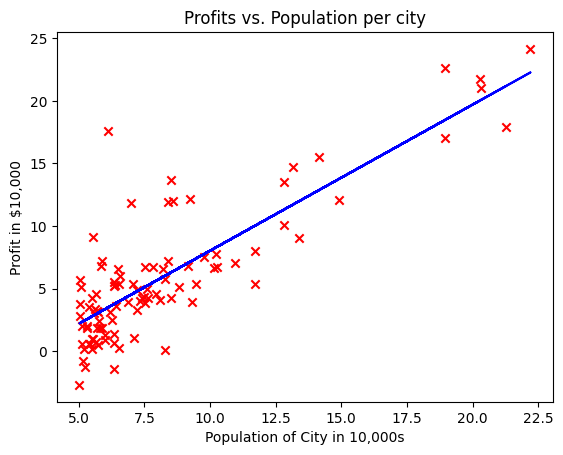

In [99]:
# Run the algorithm
initial_w = 0
initial_b = 0
iterations = 1500
alpha = 0.01

w, b, J_history, w_history, b_history = gradient_descent(
    x_train, y_train, initial_w, initial_b, alpha,
    cost_function, calculate_gradient, iterations)

# Calculate predictions and plot
m = x_train.shape[0]
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = w * x_train[i] + b

visualize(x_train, y_train, predicted)